In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sns.seaborn_qqplot import pplot

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
421,6.29,46.0,0
358,6.74,52.0,0
436,6.31,19.0,0
148,6.86,49.0,1
308,7.20,47.0,1


### Ways to detect Outliers

<AxesSubplot:xlabel='cgpa', ylabel='placement_exam_marks'>

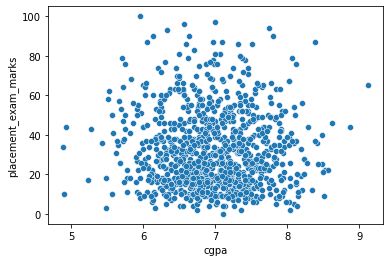

In [19]:
sns.scatterplot(data=df, x='cgpa', y='placement_exam_marks') # scatterplot

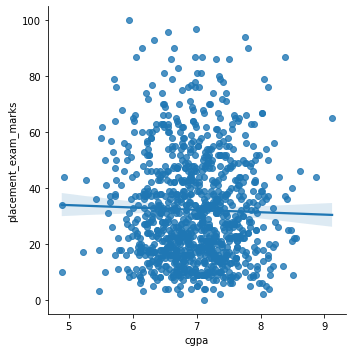

In [20]:
sns.lmplot(data=df, x='cgpa', y='placement_exam_marks') # lmplot

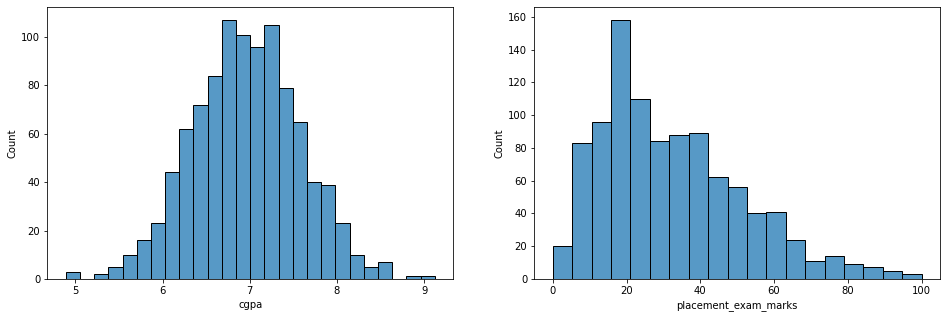

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa']) # histplot

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

<AxesSubplot:xlabel='cgpa', ylabel='placement_exam_marks'>

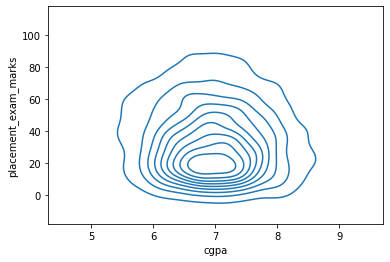

In [25]:
sns.kdeplot(x=df['cgpa'], y=df['placement_exam_marks']) # kdeplot

<AxesSubplot:>

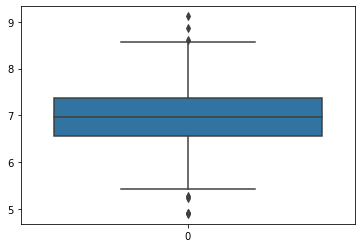

In [30]:
sns.boxplot(data=df['cgpa']) # boxplot
# sns.boxplot(data=df['placement_exam_marks'])

<AxesSubplot:>

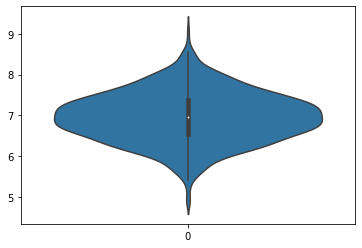

In [32]:
sns.violinplot(data=df['cgpa']) # violinplot

<AxesSubplot:xlabel='cgpa'>

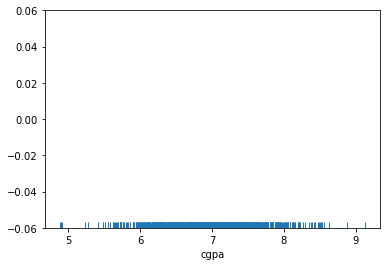

In [35]:
sns.rugplot(df['cgpa'])

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


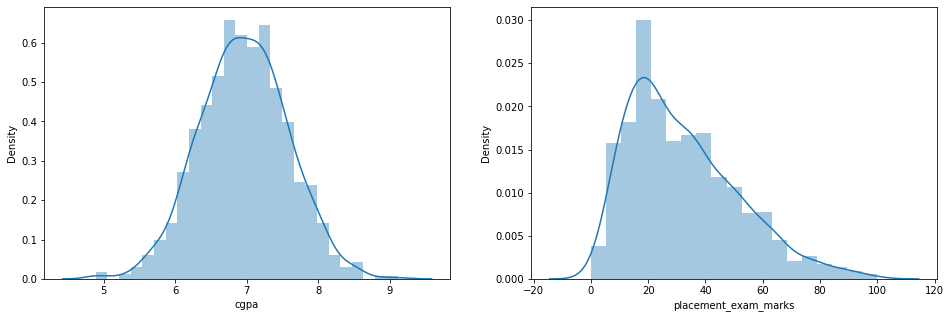

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

As we can see cgpa column is uniformly distributed, so we can apply Z-score technique on cgpa column. As column placement_exam_marks is skewed we cannot use Z-score technique on this column

### Detect Outliers

In [38]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [37]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [39]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std()) # upper limit --> (μ + 3σ)
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std()) # lower limit --> (μ - 3σ)

# Above 8.8 & below 5.1 is outliers

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [44]:
df[(df['cgpa'] > 8.8) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Removing Outliers

**Trimming**

In [52]:
# Approach 1
new_df = df[(df['cgpa'] < 8.8) & (df['cgpa'] > 5.11)]

new_df.head() # It will have only 995 rows becuase 5 outliers will be trimmed out

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [53]:
new_df.shape

(995, 3)

In [54]:
# Approach 2 - Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

#  z-score = (x-μ)/σ
# Where x is column, μ is mean of that column & σ is standard deviation of the column

In [55]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [56]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [60]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [61]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [62]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [63]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping
Without dropping outliers, we can cap them to max & min limit

In [64]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [65]:
print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

Upper Limit:  8.808933625397177
Lower Limit:  5.113546374602842


In [66]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [67]:
df.shape

(1000, 4)

In [69]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


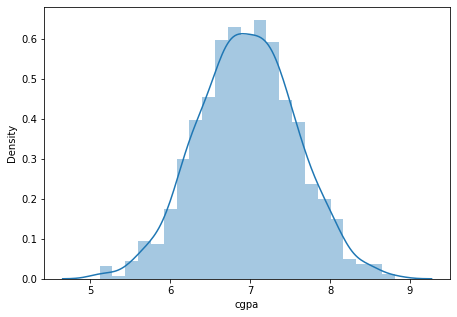

In [70]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.show()

c:\Users\User\anaconda3\files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

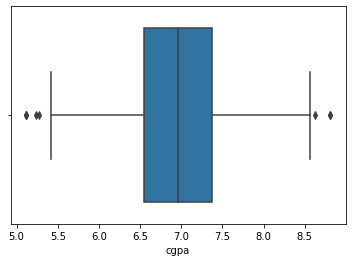

In [72]:
sns.boxplot(df['cgpa'])